# Simple NBA EDA
参考 https://www.kaggle.com/ash316/simple-nba-eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DataDir = "/home/onimem/work/NBA/original"

from subprocess import check_output
print(check_output(["ls", DataDir]).decode("utf8"))

CalledProcessError: Command '['ls', '/home/onimem/work/NBA/original']' returned non-zero exit status 2.

# Players.csv Analysis
## 整形＆欠損値処理

In [2]:
players=pd.read_csv(DataDir + '/Players.csv')
print(players.shape)
players.head()

(3922, 8)


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
players.isnull().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [4]:
players.drop('Unnamed: 0', axis=1, inplace=True)
print(players.shape)
players.head()

(3922, 7)


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
players.dropna(how='all',inplace=True)
print(players.shape)
players.isnull().sum()

(3921, 7)


Player           0
height           0
weight           0
collage        348
born             0
birth_city     469
birth_state    482
dtype: int64

In [6]:
players.set_index('Player',inplace=True)
print(players.shape)
players.head()

(3921, 6)


,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


## Basic Analysis

In [7]:
max_value = players['height'].max()
max_key = players['height'].idxmax()
print(max_key, max_value)
players.loc[max_key : max_key, :]

Manute Bol 231.0


,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Manute Bol,231.0,90.0,University of Bridgeport,1962.0,Gogrial,South Sudan


In [8]:
min_value = players['height'].min()
min_key = players['height'].idxmin()
print(min_key, min_value)
players.loc[min_key : min_key, :]

Muggsy Bogues 160.0


,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Muggsy Bogues,160.0,61.0,Wake Forest University,1965.0,Baltimore,Maryland


In [9]:
print(players.mean()['height'])
# same → print(players['height'].mean())

198.70492221372098


[]

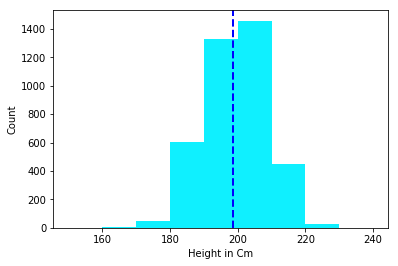

In [10]:
bins=range(150, 250, 10)
plt.hist(players["height"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Height in Cm')
plt.ylabel('Count')
plt.axvline(players["height"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.plot()

In [11]:
players.groupby(['collage']).count()
# players.groupby(['collage']) → <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x7f34140f2a90>

,height,weight,born,birth_city,birth_state
collage,,,,,
Acadia University,1,1,1,0,0
Alabama A&M University,1,1,1,1,1
Alabama State University,1,1,1,1,1
Albany State University,4,4,4,4,4
Alcorn State University,4,4,4,4,4
Alliance College,1,1,1,1,1
American International College,1,1,1,1,1
American University,1,1,1,1,1
Appalachian State University,1,1,1,1,1


In [12]:
players.groupby(['collage'])['height'].count().reset_index()

,collage,height
0,Acadia University,1
1,Alabama A&M University,1
2,Alabama State University,1
3,Albany State University,4
4,Alcorn State University,4
5,Alliance College,1
6,American International College,1
7,American University,1
8,Appalachian State University,1
9,Arizona State University,21


In [13]:
# ascending=False 降順
college = players.groupby(['collage'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
players.groupby(['collage'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]

,collage,height
311,University of Kentucky,89
289,"University of California, Los Angeles",86
335,University of North Carolina,67
310,University of Kansas,59
78,Duke University,56
341,University of Notre Dame,51
126,Indiana University,49
259,Syracuse University,49
250,St. John's University,48
314,University of Louisville,46


In [14]:
college.set_index('collage', inplace=True)
college

,height
collage,
University of Kentucky,89
"University of California, Los Angeles",86
University of North Carolina,67
University of Kansas,59
Duke University,56
University of Notre Dame,51
Indiana University,49
Syracuse University,49
St. John's University,48


In [15]:
college.columns = ['Count']
college

,Count
collage,
University of Kentucky,89
"University of California, Los Angeles",86
University of North Carolina,67
University of Kansas,59
Duke University,56
University of Notre Dame,51
Indiana University,49
Syracuse University,49
St. John's University,48


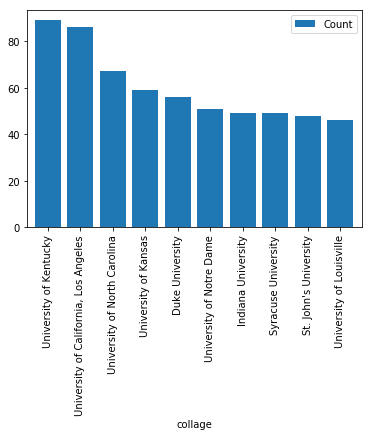

In [16]:
ax=college.plot.bar(width=0.8)

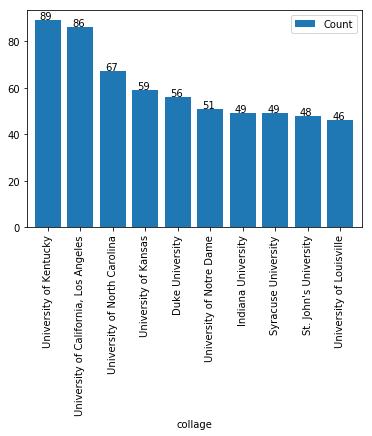

In [17]:
ax=college.plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()

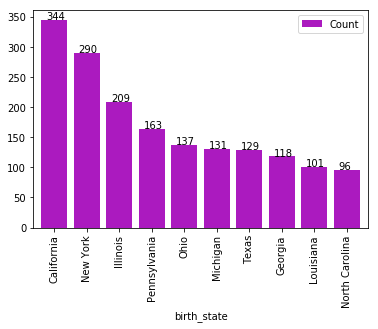

In [18]:
city=players.groupby(['birth_state'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
city.set_index('birth_state',inplace=True)
city.columns=['Count']
ax=city.plot.bar(width=0.8,color='#ab1abf')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Seasons_Stats.csv Analysis
## 整形＆欠損値処理

In [19]:
Seasons=pd.read_csv(DataDir + '/Seasons_Stats.csv')
print(Seasons.shape)
Seasons.head()

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [20]:
Seasons.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
Seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [22]:
Seasons.isnull().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [23]:
# Seasons['Player'].notnull()
Seasons['Player'].notnull().sum()

24624

In [24]:
# We can see that 67 rows have no player names. We need to drop these.
Seasons=Seasons[Seasons['Player'].notnull()] #removing entries without names
print(Seasons.shape)
Seasons.isnull().sum()

(24624, 52)


Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS         6391
MP          486
PER         523
TS%          86
3PAr       5785
FTr          99
ORB%       3832
DRB%       3832
TRB%       3053
AST%       2069
STL%       3832
BLK%       3832
TOV%       5042
USG%       4984
blanl     24624
OWS          39
DWS          39
WS           39
WS/48       523
blank2    24624
OBPM       3827
DBPM       3827
BPM        3827
VORP       3827
FG            0
FGA           0
FG%          99
3P         5697
3PA        5697
3P%        9208
2P            0
2PA           0
2P%         128
eFG%         99
FT            0
FTA           0
FT%         858
ORB        3827
DRB        3827
TRB         312
AST           0
STL        3827
BLK        3827
TOV        4979
PF            0
PTS           0
dtype: int64